# Author :- Shaurya Jakhmola
# EMAIL :- shauryajakhmola173@gmail.com
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# GRIP @ The Spark's Foundation
𝗗𝗮𝘁𝗮 𝗦𝗰𝗶𝗲𝗻𝗰𝗲 & 𝗕𝘂𝘀𝗶𝗻𝗲𝘀𝘀 𝗔𝗻𝗮𝗹𝘆𝘁𝗶𝗰𝘀

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# TASK - 2
# Prediction Using UNSUPERVISED ML
# Introduction
● We are given the iris flower dataset, with features sepal length, sepal width,petal length and petal width.  
● Our aim is to create a K means clustering classifier to classify the flower in categories that are : Iris setosa ,Iris versicolor and Iris virginica  
● Here, Python language is used to build the classifier.  
● Dataset link : https://bit.ly/3kXTdox


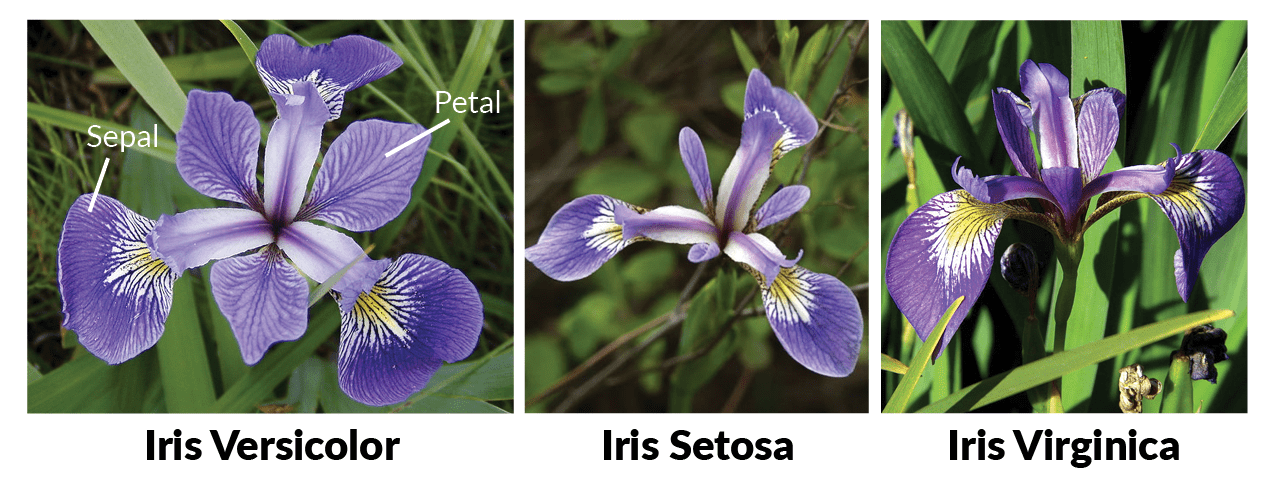

In [1]:
from PIL import Image
img = Image.open('C:/Users/shaur/Documents/The Sparks Foundation (TFS)/TASK-02/Sample/Iris.png')
img

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Fetching and Loading Data

In [3]:
iris = pd.read_csv("C:/Users/shaur/Documents/The Sparks Foundation (TFS)/TASK-02/Iris.csv")

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.shape

(150, 6)

● In Iris dataset, 5 features and 150 datapoints are present.

In [6]:
x = iris.iloc[:, : -1].values

# Checking for Null values

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


● Here , we can see that no null values are present

In [8]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

● From the above data we can say that , the iris dataset is a balanced dataset as the number of datapoints for every class are same.

# Plotting Pairplot

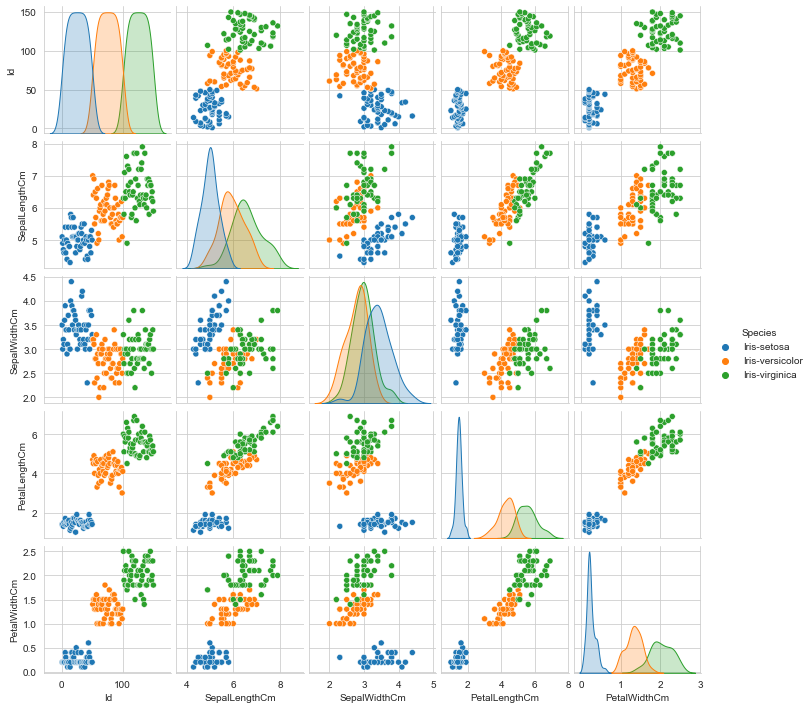

In [9]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="Species",size=2.00);
plt.show()

● From the above pairplot, using Petal Length and Petal Width would be best the features to categorise datapoints.

# K Means Clustering
# The Elbow Method

In [10]:
#Finding the optimum number of clusters for k-means classification using Elbow Methid
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

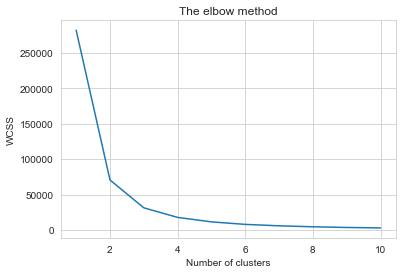

In [11]:
#Plotting the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

● For the above-graph , the optimum value for K would be 3 . As we can see that with an increase in the number of clusters the WCSS value decreases . We select the value for K on the bassis of the rate of decreases in WCSS. For example, from cluster 1 to 2 in the above graph we see a sudden and huge drop in WCSS. After 3 the drop is minimal and hence we chose 3 to be optimal value for K.

# Silhouette Score

In [12]:
for num_clusters in range(2,11):

  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
  kmeans.fit(x)

  cluster_labels = kmeans.labels_
  
  # silhouette score
  silhouette_avg = silhouette_score(x, cluster_labels)
  print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, 
                        silhouette_avg))

For n_clusters=2, the silhouette score is 0.6204656046551029
For n_clusters=3, the silhouette score is 0.5821934246576435
For n_clusters=4, the silhouette score is 0.5565212241684705
For n_clusters=5, the silhouette score is 0.5405109783730785
For n_clusters=6, the silhouette score is 0.532128317816943
For n_clusters=7, the silhouette score is 0.5176522612269746
For n_clusters=8, the silhouette score is 0.5093788980678473
For n_clusters=9, the silhouette score is 0.5061981040743733
For n_clusters=10, the silhouette score is 0.4929349383104488


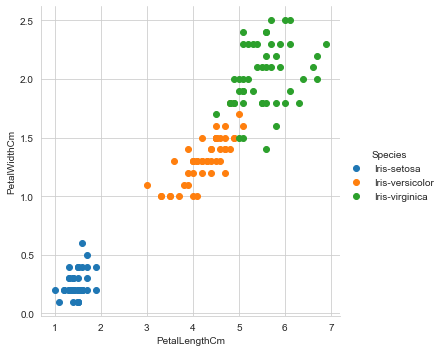

In [13]:
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue = 'Species', size=5).map(plt.scatter, 'PetalLengthCm',
                                                 'PetalWidthCm').add_legend()
plt.show()

In [14]:
#final model with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter =300,n_init =10,random_state=0)
y_kmeans = kmeans.fit_predict(x)

# Visualising the Clusters with Centroids

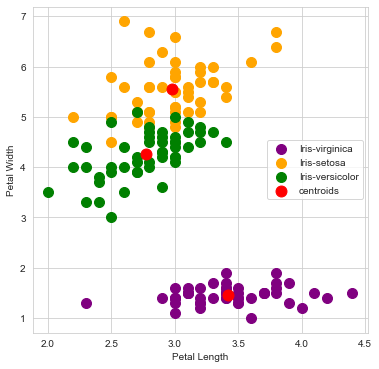

In [15]:
# Visualising the clusters
fig = plt.figure(figsize=(6,6))
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3],s = 100, c = 'purple', label = 'Iris-virginica')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3],s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],s = 100, c = 'green', label = 'Iris-versicolor')

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2],kmeans.cluster_centers_[:,3],s=120,c='red',label='centroids')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend();

# Conclusion
● Using Petal length and Petal width features, we can distinguish Setosa flowers from others.   
● Seperating versicolor from virginica is quite hard as they have few datapoints considerably overlapped.